In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME' 'STATUS', 'SPECIAL_CONSIDERATIONS'.
application_df = application_df.drop(columns = ['EIN', 'NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1
...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,5000,0
34297,T5,Independent,C3000,ProductDev,Association,0,5000,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Drop the non-beneficial ID columns, 'ASK_AMT	'.
application_df = application_df.drop(columns = ['ASK_AMT'])
application_df


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,1
...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,0
34297,T5,Independent,C3000,ProductDev,Association,0,1


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE    17
AFFILIATION          6
CLASSIFICATION      71
USE_CASE             5
ORGANIZATION         4
INCOME_AMT           9
IS_SUCCESSFUL        2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
type_counts = application_df['APPLICATION_TYPE'].value_counts()
type_counts


APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(type_counts.iloc[8:].index)
cutoff_value = 528

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other_app_type")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3                27037
T4                 1542
T6                 1216
T5                 1173
T19                1065
T8                  737
T7                  725
T10                 528
Other_app_type      276
Name: count, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_types = application_df['CLASSIFICATION'].value_counts()
classification_types


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_types.iloc[5:].index)
cutoff_value_classifications = 1883

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other_classification")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000                   17326
C2000                    6074
C1200                    4837
Other_classification     2261
C3000                    1918
C2100                    1883
Name: count, dtype: int64

In [10]:
#convert the categorical data in numeric using get_dummies()
dummies = pd.get_dummies(application_df)
dummies.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other_app_type,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,0,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,False,False,False,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,1,False,False,False,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [15]:
# Split our preprocessed data into our features and target arrays
y = dummies['IS_SUCCESSFUL'].values
x = dummies.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
x_scaler = scaler.fit(x_train)

# Scale the data
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

In [17]:
# (First Attempt)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(x_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

C:\Users\AKKem\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile the model (Attempt 1)
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Train the model (Attempt 1)
fit_model = nn.fit(x_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.6837 - loss: 0.6227
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.7291 - loss: 0.5683
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.7300 - loss: 0.5586
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.7250 - loss: 0.5613
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.7295 - loss: 0.5546
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.7328 - loss: 0.5487
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.7245 - loss: 0.5590
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.7290 - loss: 0.5530
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.7322 - loss: 0.5494
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.7320 - loss: 0.5490
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.7272 - loss: 0.5522
Epoch 12/100
804/80

In [ ]:
# Evaluate the model using the test data (Attempt 1 - Accuracy 72.8%)
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5580 - accuracy: 0.7278 - 450ms/epoch - 2ms/step
Loss: 0.5580063462257385, Accuracy: 0.7278134226799011


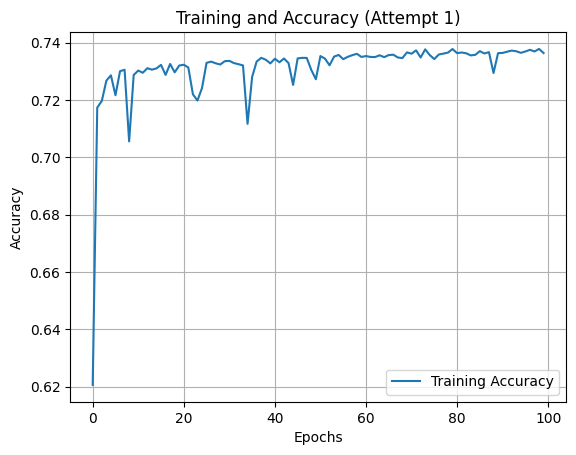

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and accuracy
plt.plot(fit_model.history['accuracy'], label='Training Accuracy')
plt.title('Training and Accuracy (Attempt 1)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# (Attempt 2)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                400       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 521 (2.04 KB)
Trainable params: 521 (2.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model (Attempt 2)
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model (Attempt 2)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.6083 - accuracy: 0.6942
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5615 - accuracy: 0.7265
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.7271
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5537 - accuracy: 0.7296
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5524 - accuracy: 0.7312
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5512 - accuracy: 0.7313
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5505 - accuracy: 0.7317
Epoch 8/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5499 - accuracy: 0.7317
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5497 - accuracy: 0.7315
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5493 - accura

In [ ]:
# Evaluate the model using the test data (Attempt 2 - Accuracy 72.8%)
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5544 - accuracy: 0.7284 - 622ms/epoch - 2ms/step
Loss: 0.5544129610061646, Accuracy: 0.728396475315094


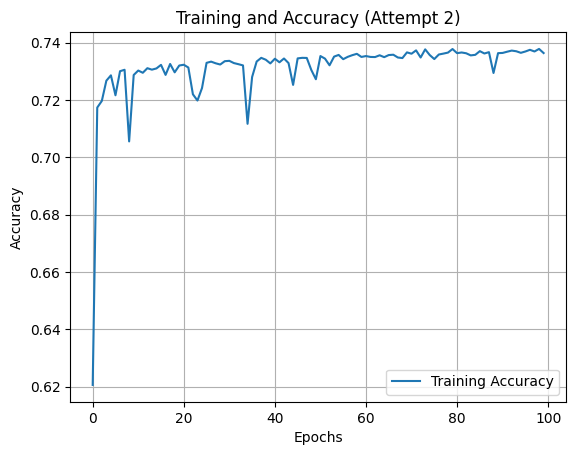

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and  accuracy
plt.plot(fit_model.history['accuracy'], label='Training Accuracy')
plt.title('Training and Accuracy (Attempt 2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# (Attempt 3)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                800       
                                                                 
 dense_7 (Dense)             (None, 20)                420       
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1241 (4.85 KB)
Trainable params: 1241 (4.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model (Attempt 3)
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model (Attempt 3)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 2.0330 - accuracy: 0.6206
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5776 - accuracy: 0.7173
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5765 - accuracy: 0.7196
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5632 - accuracy: 0.7267
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5618 - accuracy: 0.7286
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5749 - accuracy: 0.7216
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5587 - accuracy: 0.7300
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5564 - accuracy: 0.7305
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6077 - accuracy: 0.7055
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5608 - accura

In [ ]:
# Evaluate the model using the test data (Attempt 3 - Accuracy 72.6%)
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


268/268 - 0s - loss: 0.5757 - accuracy: 0.7259 - 448ms/epoch - 2ms/step
Loss: 0.5756950378417969, Accuracy: 0.7259474992752075


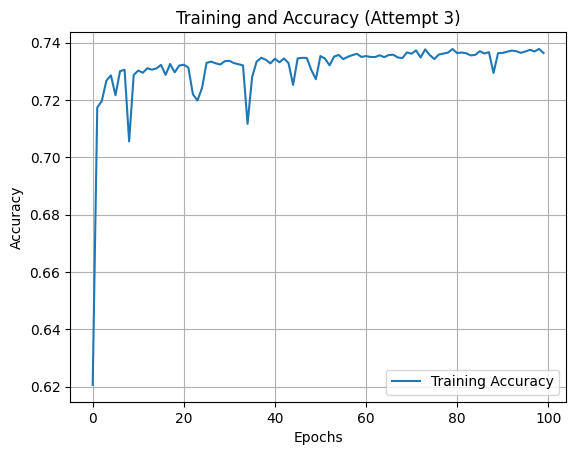

In [ ]:
# Plot the training and accuracy
plt.plot(fit_model.history['accuracy'], label='Training Accuracy')
plt.title('Training and Accuracy (Attempt 3)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Export our model to HDF5 file
import os

# Define the filepath where you want to save the model
folder_path = r"C:\Users\AKKem\OneDrive\Desktop"

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Define the filepath including the filename
filepath = os.path.join(folder_path, "AlphabetSoupCharity_Optimization.h5")

# Save the model to the HDF5 file
nn.save(filepath)

# Print a message indicating that the model has been saved successfully
print("Model saved to", filepath)


Model saved to C:\Users\AKKem\OneDrive\Desktop/AlphabetSoupCharity_Optimization.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
